# ANN Regression

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
!nvidia-smi -L
print(f'Tensorflow version: {tf.__version__}')

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)
Tensorflow version: 2.3.1


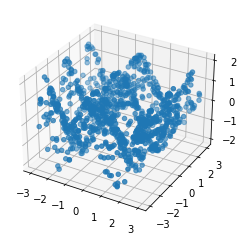

In [3]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3
y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)
plt.show()

Epoch 1/100
32/32 [==============================] - 0s 961us/step - loss: 0.9371
Epoch 2/100
32/32 [==============================] - 0s 946us/step - loss: 0.8872
Epoch 3/100
32/32 [==============================] - 0s 930us/step - loss: 0.8426
Epoch 4/100
32/32 [==============================] - 0s 977us/step - loss: 0.8375
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8129
Epoch 6/100
32/32 [==============================] - 0s 992us/step - loss: 0.7684
Epoch 7/100
32/32 [==============================] - 0s 977us/step - loss: 0.6791
Epoch 8/100
32/32 [==============================] - 0s 992us/step - loss: 0.6454
Epoch 9/100
32/32 [==============================] - 0s 945us/step - loss: 0.5917
Epoch 10/100
32/32 [==============================] - 0s 963us/step - loss: 0.5724
Epoch 11/100
32/32 [==============================] - 0s 961us/step - loss: 0.5260
Epoch 12/100
32/32 [==============================] - 0s 976us/step - loss: 0.5396
Epoch 13/100
32

32/32 [==============================] - 0s 945us/step - loss: 0.0134


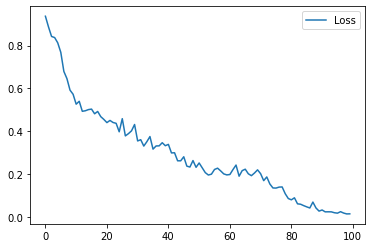

In [4]:
i = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(128, activation='relu')(i)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.models.Model(i, x)

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse')

r = model.fit(X, y,
              epochs=100)

plt.plot(r.history.get('loss'), label='Loss')
plt.legend()
plt.show()

## Plot the prediction surface

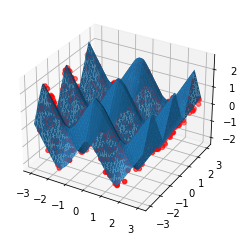

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='red')

ticks = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(ticks, ticks)
X_hat = np.vstack((xx.flatten(), yy.flatten())).T
y_hat = model.predict(X_hat).flatten()
ax.plot_trisurf(xx.flatten(), yy.flatten(), y_hat, linewidth=0.2, antialiased=True)
plt.show()

## See if the neural network can extrapolate

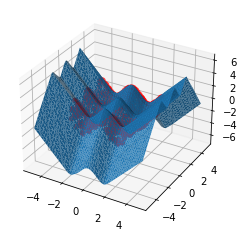

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='red')

ticks = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(ticks, ticks)
X_hat = np.vstack((xx.flatten(), yy.flatten())).T
y_hat = model.predict(X_hat).flatten()
ax.plot_trisurf(xx.flatten(), yy.flatten(), y_hat, linewidth=0.2, antialiased=True)
plt.show()